In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from scipy import stats as scistats




With Outliers:
Mean: 21.09090909090909
Median: 13.0
Mode: 13


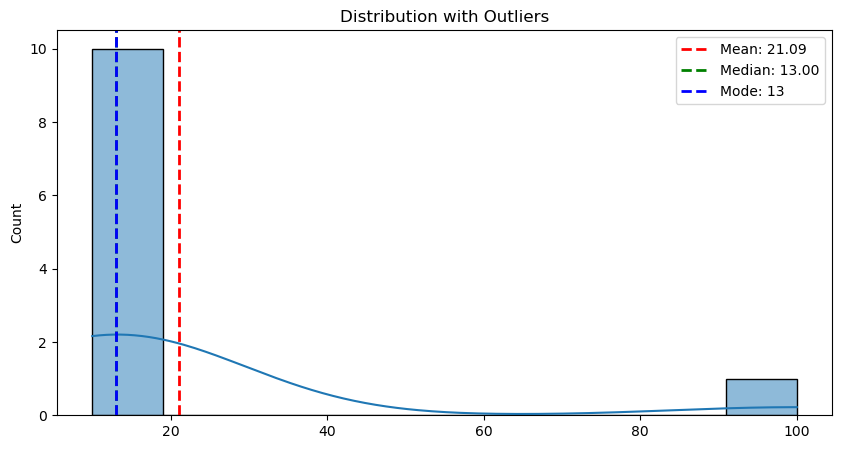


Without Outliers:
Mean: 13.2
Median: 13.0
Mode: 13


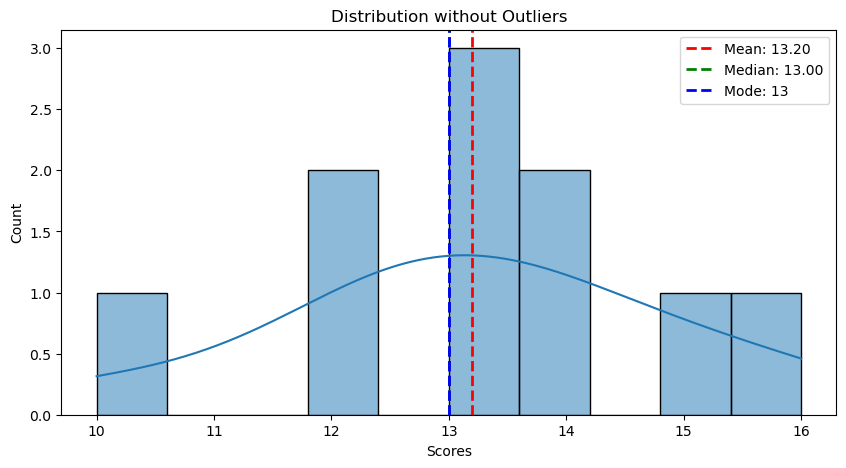

In [8]:
# Solutions for Q-1:

# 1st we will Create a dataset with outliers
original_data = [10, 12, 12, 13, 13, 13, 14, 14, 15, 16, 100]  # Here 100 is an outlier
df = pd.DataFrame(original_data, columns=['Scores'])

#Case-1: With Outliers 
# We will calculate the Central tendency with outliers
mean_with_outliers = np.mean(original_data)
median_with_outliers = np.median(original_data)
mode_with_outliers = stats.mode(original_data)

print("With Outliers:")
print(f"Mean: {mean_with_outliers}")
print(f"Median: {median_with_outliers}")
print(f"Mode: {mode_with_outliers}")



# We will plot histogram for case-1
plt.figure(figsize=(10, 5))
sns.histplot(original_data, bins=10, kde=True)
plt.title('Distribution with Outliers')
plt.axvline(mean_with_outliers, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_with_outliers:.2f}')
plt.axvline(median_with_outliers, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_with_outliers:.2f}')
plt.axvline(mode_with_outliers, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_with_outliers}')
plt.legend()
plt.show()



#Case-2: We will remove the Outliers 
# We will do that by usimg IQR method [IQR = Q3-Q1]
Q1 = df['Scores'].quantile(0.25)
Q3 = df['Scores'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_without_outliers = df[(df['Scores'] >= lower_bound) & (df['Scores'] <= upper_bound)]['Scores']

# Now we will calculate the Central tendency without outliers
mean_without_outliers = np.mean(data_without_outliers)
median_without_outliers = np.median(data_without_outliers)
mode_without_outliers = stats.mode(data_without_outliers)

print("\nWithout Outliers:")
print(f"Mean: {mean_without_outliers}")
print(f"Median: {median_without_outliers}")
print(f"Mode: {mode_without_outliers}")




# We will plot the Histogram for case -2
plt.figure(figsize=(10, 5))
sns.histplot(data_without_outliers, bins=10, kde=True)
plt.title('Distribution without Outliers')
plt.axvline(mean_without_outliers, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_without_outliers:.2f}')
plt.axvline(median_without_outliers, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_without_outliers:.2f}')
plt.axvline(mode_without_outliers, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_without_outliers}')
plt.legend()
plt.show()


Mean: 83.78260869565217
Median: 84
Mode: 80


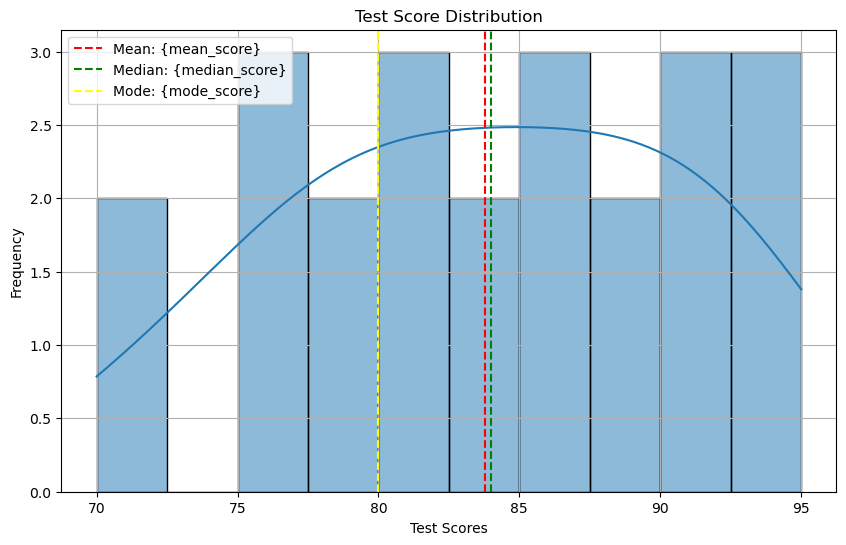

In [15]:
#Solution for Q-2 

# Taking and example for test scores dataset
test_scores = [80, 85, 95, 78, 88, 70, 92, 82, 84, 90, 
               75, 87, 79, 91, 72, 83, 86, 89, 93, 77, 
               94, 81, 76]

# Here we will Calculate the Mean, Median, Mode
mean_score = stats.mean(test_scores)
median_score = stats.median(test_scores)
mode_score = stats.mode(test_scores)

print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Mode: {mode_score}")




plt.figure(figsize=(10, 6))
sns.histplot(test_scores, bins=10, kde=True) 

# Plot the Histogram 
plt.axvline(mean_score, color='red', linestyle='--', label="Mean: {mean_score}")
plt.axvline(median_score, color='green', linestyle='--', label="Median: {median_score}")
plt.axvline(mode_score, color='yellow', linestyle='--', label="Mode: {mode_score}")

plt.title("Test Score Distribution")
plt.xlabel("Test Scores")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


Range: 25
IQR: 11.0
Variance: 51.36
Standard Deviation: 7.17


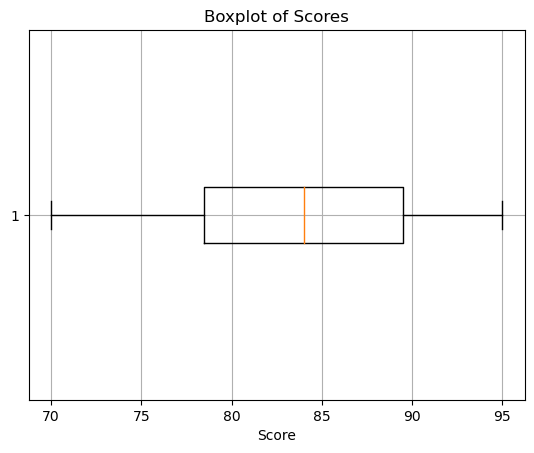

In [20]:
# Solutions for Q-3 
#Dispersion = How the spread out the data is 

# Taking and example for test scores dataset
test_scores = [80, 85, 95, 78, 88, 70, 92, 82, 84, 90, 
               75, 87, 79, 91, 72, 83, 86, 89, 93, 77, 
               94, 81, 76]

#Starting with Range = Max value - Min value
range_val = np.max(test_scores) - np.min(test_scores)

# Then IQR = Q3 - Q1
q1 = np.percentile(test_scores, 25)
q3 = np.percentile(test_scores, 75)
iqr = q3 - q1

# Sample Variance = (x - X)/(n-1) ; here x = each data point of sample , X = mean of the sample
variance = np.var(test_scores, ddof=1)  # Here for sample var or sample Std. the (ddof =1 ). If it population var, then (ddof =0)

# Std.deviation = Square root of variance
std_dev = np.std(test_scores, ddof=1)   


print(f"Range: {range_val}")
print(f"IQR: {iqr}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


# For Box plot:
plt.boxplot(test_scores, vert=False)
plt.title("Boxplot of Scores")
plt.xlabel("Score")
plt.grid(True)
plt.show()



In [21]:
#Solution for Q-4

from scipy.stats import ttest_rel

# Here is the Sample data for test scores before and after a study program
before = np.array([65, 70, 68, 72, 60, 75, 78, 67, 66, 74])
after  = np.array([70, 75, 72, 78, 65, 80, 82, 72, 70, 78])

t_stat, p_value = ttest_rel(after, before)


print(f"Paired t-test results:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("→ Reject the null hypothesis: The program had a significant effect.")
else:
    print("→ Fail to reject the null hypothesis: No significant effect detected.")


Paired t-test results:
t-statistic: 22.021
p-value: 0.0000
→ Reject the null hypothesis: The program had a significant effect.


In [23]:
#Solution for Q-5


# Reject Null Hypothesis -> Type I Error
#  Fail to Reject Null Hypothesis -> Type II Error


from scipy.stats import ttest_ind

def type_of_errors(n=30, alpha=0.05):
    np.random.seed(42)
    
# I'm here trying to create two group of (A & B) of having same mean
    group_A = np.random.normal(loc=50, scale=10, size=n)
    group_B = np.random.normal(loc=50, scale=10, size=n) 
    
    t_stat_1, p_val_1 = ttest_ind(group_A, group_B)
    
    if p_val_1 < alpha:
        print("Type I Error simulated: Rejected a TRUE null hypothesis.")
    else:
        print("No Type I Error: Correctly failed to reject a TRUE null.")

# I'm here trying to create group B of having different mean compare to group A 
    group_B_diff = np.random.normal(loc=60, scale=10, size=n)  
    
    t_stat_2, p_val_2 = ttest_ind(group_A, group_B_diff)
    
    if p_val_2 >= alpha:
        print("Type II Error simulated: Failed to reject a FALSE null hypothesis.")
    else:
        print("No Type II Error: Correctly rejected a FALSE null.")

# Run the simulation
type_of_errors()


No Type I Error: Correctly failed to reject a TRUE null.
No Type II Error: Correctly rejected a FALSE null.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Predicted salary for 5 years of experience: $50000


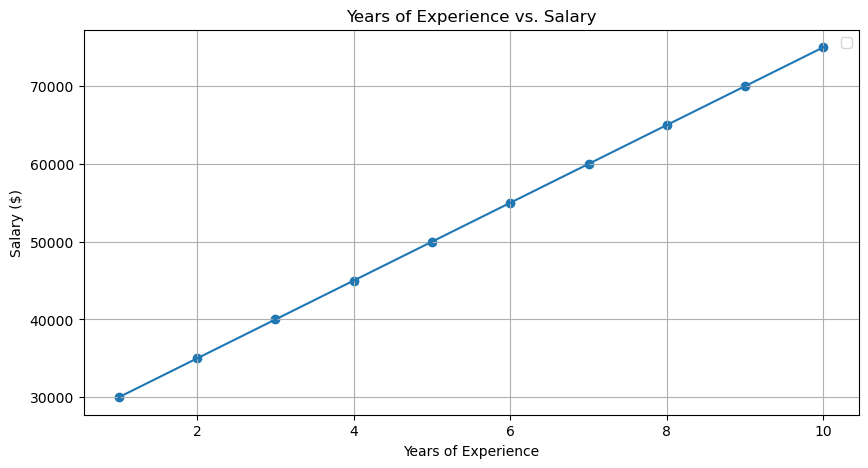

In [8]:
#Solution for Q-6


from sklearn.linear_model import LinearRegression

# Here I'm creating a dataset, the random salaries with years of Experience 
years_of_experience = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 10]).reshape(-1, 1)
salaries = np.array([30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000])

# Building a simple Linear Regression Model
model = LinearRegression()
model.fit(years_of_experience, salaries)

#Here I'm gonna Predict the salary for 5 years of experience
pred_5_years = model.predict(np.array([[5]]))[0]
print(f"Predicted salary for 5 years of experience: ${pred_5_years:.0f}")


plt.figure(figsize=(10, 5))
plt.scatter(years_of_experience, salaries) 
plt.plot(years_of_experience, model.predict(years_of_experience))
plt.title("Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import sklearn.linear_model
dir(sklearn.linear_model)
help(sklearn.linear_model.LinearRegression)


Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

Linear Model - Train MSE: 258.51, Test MSE: 211.26
Polynomial Model (deg=15) - Train MSE: 6.49, Test MSE: 7.96


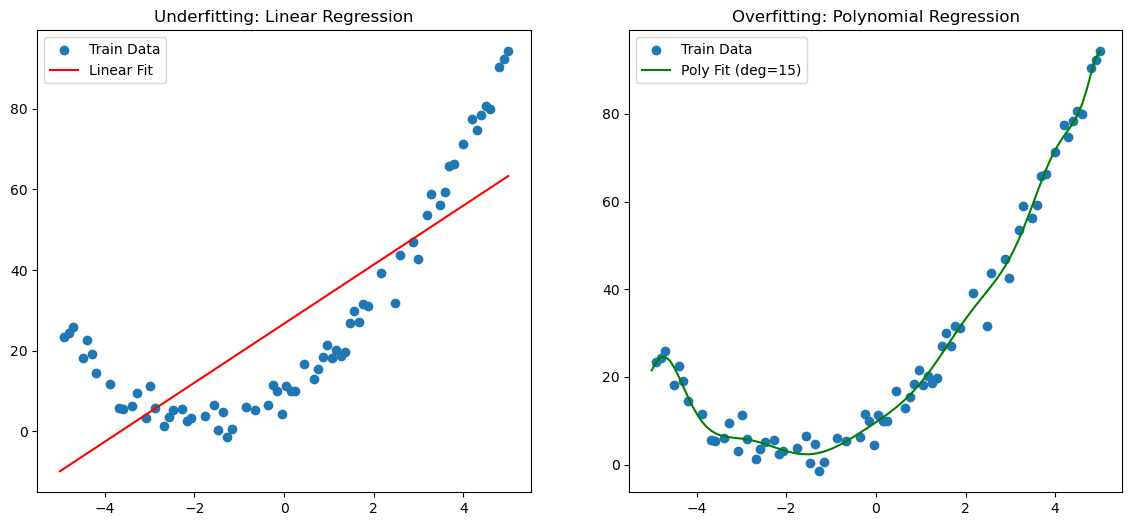

In [13]:
#Solution for Q-7

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  As per Question,I'm trying to Generating quadratic + Linear equation (y = 2x^2 +7x 10 + noise)
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y = 2 * X**2 + 7 * X + 10 + np.random.randn(100) * 3   

# I'm here reshaping 1D to 2D 
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# SSpliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Here I'm taking degree = 1 vs Degree = 15, . The First One is linear model, so it won't give curve , and the last one is very flexiable model type.
# Linear model (degree=1)
linear_model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
linear_model.fit(X_train, y_train)

y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)

print(f"Linear Model - Train MSE: {mse_train_linear:.2f}, Test MSE: {mse_test_linear:.2f}")



# Overfitting model (degree=15)
poly_model = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly_model.fit(X_train, y_train)

y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Train & Test MSE
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

print(f"Polynomial Model (deg=15) - Train MSE: {mse_train_poly:.2f}, Test MSE: {mse_test_poly:.2f}")



# Sort for clean plotting
X_plot = np.linspace(-5, 5, 100).reshape(-1, 1)
y_linear_plot = linear_model.predict(X_plot)
y_poly_plot = poly_model.predict(X_plot)

plt.figure(figsize=(14, 6))

# Linear Model
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Train Data')
plt.plot(X_plot, y_linear_plot, color='red', label='Linear Fit')
plt.title("Underfitting: Linear Regression")
plt.legend()

# Polynomial Model
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, label='Train Data')
plt.plot(X_plot, y_poly_plot, color='green', label='Poly Fit (deg=15)')
plt.title("Overfitting: Polynomial Regression")
plt.legend()
plt.show()





Linear Regression MSE: 1942.52
Polynomial Regression MSE: 5.42
Lasso Regression MSE: 5.40


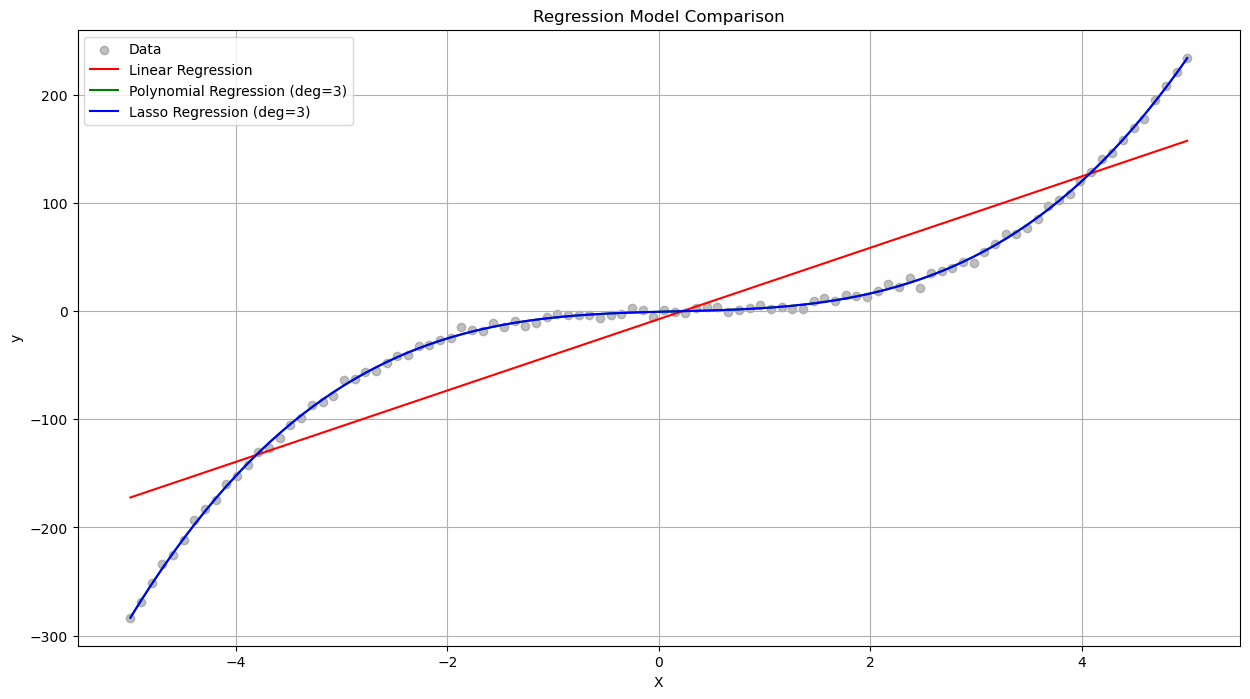

In [18]:
# Solution for Q-8


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Generating quadratic + Linear equation (y = 2x^3 -x^2 +2x + noise)
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 2 * X**3 - X**2 + 2 * X + np.random.normal(0, 3, size=X.shape)

# Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here the 1st Question: Linear Regression (degree=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# the 2nd Question: Polynomial Regression (degree=3)

poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# the 3rd Questions: Lasso Regression with Polynomial Features (degree=3)
lasso_model = make_pipeline(PolynomialFeatures(degree=3), Lasso(alpha=0.1, max_iter=10000))
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

#Mean Squared Error(mse)
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Polynomial Regression MSE: {mse_poly:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

# Plotting 
X_plot = np.linspace(-5, 5, 100).reshape(-1, 1)
y_plot_linear = linear_model.predict(X_plot)
y_plot_poly = poly_model.predict(X_plot)
y_plot_lasso = lasso_model.predict(X_plot)

plt.figure(figsize=(15, 8))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')

plt.plot(X_plot, y_plot_linear, color='red', label='Linear Regression')
plt.plot(X_plot, y_plot_poly, color='green', label='Polynomial Regression (deg=3)')
plt.plot(X_plot, y_plot_lasso, color='blue', label='Lasso Regression (deg=3)')

plt.title("Regression Model Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


Pearson Correlation Coefficient: 0.94


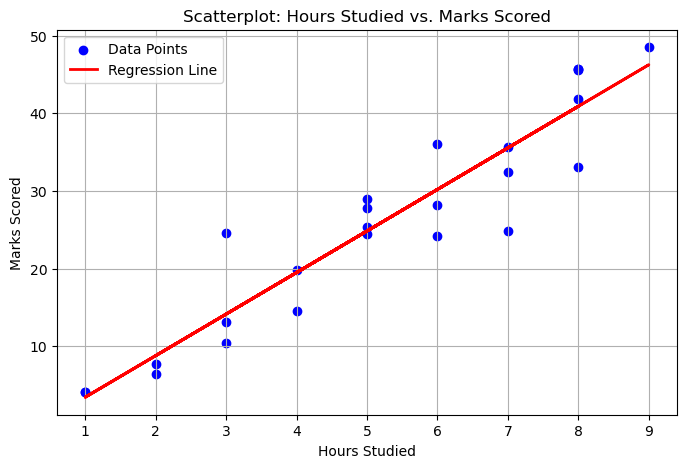

In [22]:
# Solution for Q-9

from sklearn.linear_model import LinearRegression

# generating the data

np.random.seed(42)
hours_studied = np.random.randint(1, 10, size=25).reshape(-1, 1)   # Independent variable
marks_scored = 5 * hours_studied + np.random.normal(0, 5, size=hours_studied.shape)  # Dependent variable with noise


plt.figure(figsize=(8, 5))
plt.scatter(hours_studied, marks_scored, color='blue', label='Data Points')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Scatterplot: Hours Studied vs. Marks Scored')

# As per Question (a) : Pearson Correlation Coefficient
correlation = np.corrcoef(hours_studied.flatten(), marks_scored.flatten())[0, 1]
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

# As per Question (b) :Linear Regression Model
model = LinearRegression()
model.fit(hours_studied, marks_scored)
predicted_marks = model.predict(hours_studied)

# and finally we have to do the Overlay Regression Line on scatterplot 
plt.plot(hours_studied, predicted_marks, color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.grid(True)
plt.show()
